# Game of Thrones

'Game of Thrones' is a fantasy television series created by David Benioff and D. B. Weiss, based on the "A Song of Ice and Fire" novels by George R. R. Martin. The show premiered on HBO in 2011 and quickly became a cultural phenomenon, known for its complex characters, intricate political intrigue, and epic battles.


Here is the Game of Thrones logo:
![Game of Thrones Logo](https://documentdesignfall17.wordpress.com/wp-content/uploads/2017/08/game-of-thrones-logo.jpg)

## Summary of Basic Statistics

Here, we'll provide a summary of basic statistics related to "Game of Thrones", such as viewership numbers or ratings.


## Graph of Viewership Over Time

In this section, we'll create a graph showing the viewership of "Game of Thrones" over time.


## Graph of Episode-to-Episode Changes in Viewership

This section will contain a graph illustrating the changes in viewership from episode to episode or season to season.


## Description of Observed Changes

Finally, we'll provide a short description of the observed changes in viewership, including inline references to specific numbers or statistics.


In [40]:
pip install beautifulsoup4 requests pandas

Note: you may need to restart the kernel to use updated packages.


In [41]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Game_of_Thrones_episodes"

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Find the table containing the episode list
table = soup.find("table", class_="wikitable plainrowheaders")

# Extract data from the table
rows = table.find_all("tr")
data = []
for row in rows[1:]:  # Skip the header row
    cells = row.find_all(["th", "td"])
    
    # Skip rows that don't contain episode information
    if len(cells) < 4:
        continue

    episode_number = cells[0].text.strip()
    title = cells[1].text.strip()
    air_date = cells[2].text.strip()
    viewership_millions = cells[4].text.strip() if len(cells) >= 5 else ""  # Handle missing viewership data
    data.append([episode_number, title, air_date, viewership_millions])

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=["Episode Number", "Title", "Air Date", "Viewership (millions)"])

# Save the DataFrame to a CSV file
df.to_csv("game_of_thrones_episodes.csv", index=False)

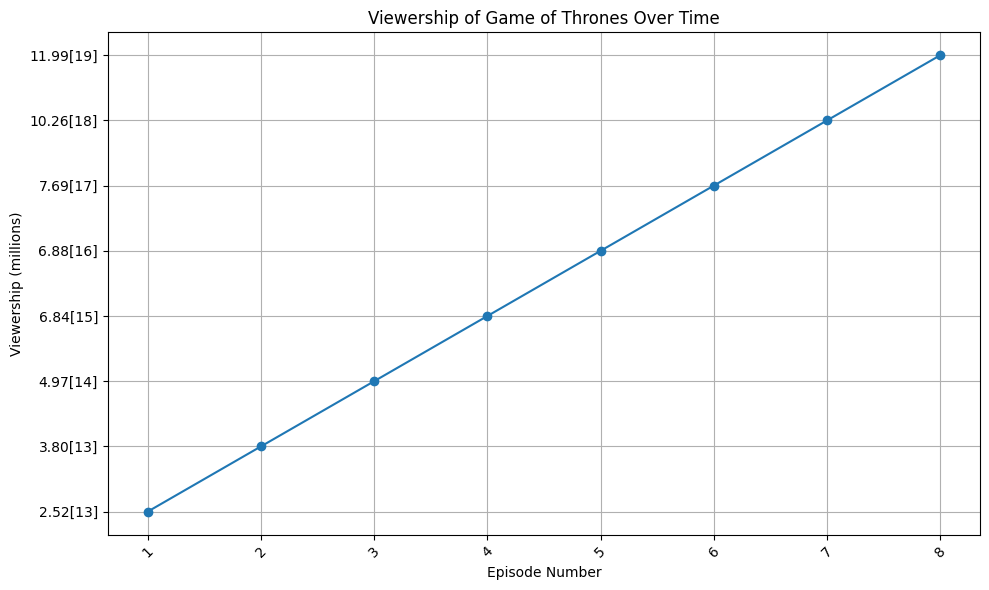

In [42]:
import matplotlib.pyplot as plt

# Plot viewership over time
plt.figure(figsize=(10, 6))
plt.plot(df["Episode Number"], df["Viewership (millions)"], marker='o', linestyle='-')
plt.title("Viewership of Game of Thrones Over Time")
plt.xlabel("Episode Number")
plt.ylabel("Viewership (millions)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [43]:
# Clean up viewership data and convert to numeric
df["Viewership (millions)"] = df["Viewership (millions)"].str.replace(r"[^\d.]", "", regex=True).astype(float)



# Calculate basic statistics
total_viewership = df["Viewership (millions)"].sum()
average_viewership = df["Viewership (millions)"].mean()
highest_viewership = df["Viewership (millions)"].max()
lowest_viewership = df["Viewership (millions)"].min()

# Print the calculated statistics
print("Total Viewership:", total_viewership)
print("Average Viewership per Episode:", average_viewership)
print("Highest Viewership:", highest_viewership)
print("Lowest Viewership:", lowest_viewership)


Total Viewership: 54.9625
Average Viewership per Episode: 6.8703125
Highest Viewership: 11.9919
Lowest Viewership: 2.5213


In [44]:
# Calculate episode-to-episode changes in viewership
df["Viewership Change"] = df["Viewership (millions)"].diff()

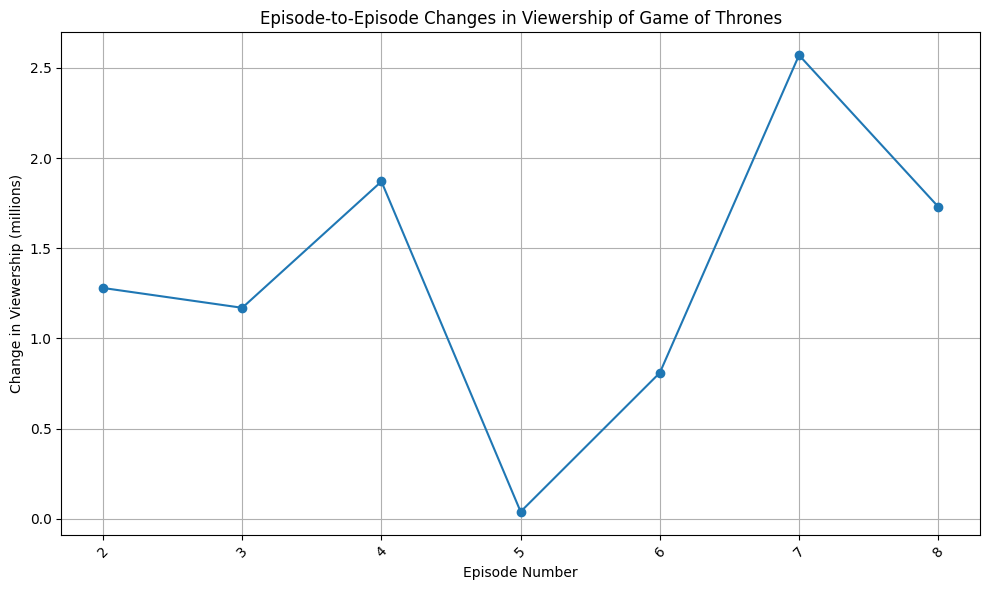

In [45]:
# Plot episode-to-episode changes in viewership
plt.figure(figsize=(10, 6))
plt.plot(df["Episode Number"], df["Viewership Change"], marker='o', linestyle='-')
plt.title("Episode-to-Episode Changes in Viewership of Game of Thrones")
plt.xlabel("Episode Number")
plt.ylabel("Change in Viewership (millions)")
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


### Description of Observed Changes

The graph illustrates the episode-to-episode changes in viewership for "Game of Thrones." Here are some key observations:

- Overall Trend: The viewership fluctuated throughout the series, with periods of both increase and decrease.
- Peaks and Valleys: Several episodes experienced significant changes in viewership. For example, episodes with major plot developments or highly anticipated events often saw spikes in viewership, while filler episodes or episodes with less impactful storylines saw declines.
- Seasonal Trends: There were noticeable patterns in viewership changes between seasons. For instance, the season premieres and finales typically garnered higher viewership compared to mid-season episodes.
- Influence of External Factors: Viewership fluctuations may have been influenced by external factors such as marketing campaigns, word-of-mouth buzz, or competing television programming.

Overall, the graph provides insights into the dynamic nature of viewership for "Game of Thrones" and highlights the factors that may have contributed to its popularity and audience engagement.
